# (sFigure3)-Characterization of Signature Genes of Sub Cell Types of CD8+ and CD4+ T Cells.

In [2]:
import omicverse as ov
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.5.9, Tutorials: https://omicverse.readthedocs.io/


In [3]:
import os
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties

font_path = 'Gastric/Arial.ttf'
front_prop = FontProperties(fname=font_path)

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [6]:
adata = sc.read_h5ad('Gastric/Data/Gastric_NKT_anno_new.h5ad')
adata_raw = sc.read_h5ad('Gastric/Data/Gastric_Origin.h5ad')
adata, adata_raw

(AnnData object with n_obs × n_vars = 14035 × 2000
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type'
     uns: 'Person_colors', 'Sample_colors', 'T', 'dendrogram_T', 'leiden', 'leiden_sizes', 'neighbors', 'paga', 'umap'
     obsm: 'X_pca', 'X_scVI', 'X_umap'
     layers: 'counts'
     obsp: 'connectivities', 'distances',
 AnnData object with n_obs × n_vars = 63398 × 32559
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person'
     var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
     uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_leiden', 'dendrogram_maj

In [7]:
adata_raw = adata_raw[adata.obs.index]
adata_raw.obs = adata.obs
adata_raw.uns = adata.uns
adata_raw.obsm = adata.obsm
adata_raw

AnnData object with n_obs × n_vars = 14035 × 32559
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'Person_colors', 'Sample_colors', 'T', 'dendrogram_T', 'leiden', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [8]:
type_color_rna={
    'CD8.Mait':'#81B330',
    'CD8.Tem':'#249F3A',
    'CD8.Trm':'#0A5D2F',
    'CD8.Tea':'#BCCE85',
    'CD4.Treg':'#F3C5C7',
    'CD4.Trm':'#E1635E',
    'CD4.Tfh':'#89428F',
    'CD4.Tn':'#F2BC1D',
    'CD4.Th17':'#D41661',
    'CD4.Tem':'#D2890B',
    'NK.CD56_Bright':'#31829F',
    'NK.CD56_Dim':'#6BBBDA',
    'Cycling.T':'#4D4F95'
}
adata.uns['T/NK_celltype_colors']=adata.obs['T/NK_celltype'].cat.categories.map(type_color_rna).values.tolist()
adata_raw.uns['T/NK_celltype_colors']=adata_raw.obs['T/NK_celltype'].cat.categories.map(type_color_rna).values.tolist()

# CD8 annotation

In [423]:
adata_CD8 = adata[adata.obs['T/NK_type']=='CD8']
adata_CD8

View of AnnData object with n_obs × n_vars = 6184 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type'
    uns: 'Person_colors', 'Sample_colors', 'T', 'dendrogram_T', 'leiden', 'leiden_sizes', 'neighbors', 'paga', 'umap', 'T/NK_celltype_colors', 'dendrogram_leiden'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [424]:
sc.pp.neighbors(adata_CD8, use_rep="X_scVI", metric="cosine",n_neighbors=15, random_state = 112)
sc.tl.leiden(adata_CD8,resolution=1.5)
sc.tl.paga(adata_CD8)
sc.pl.paga(adata_CD8, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata_CD8,init_pos='paga')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
running Leiden clustering
    finished: found 26 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:03)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)


In [425]:
marker_genes_dict = {
    'CD8_Tn':['TCF7','LEF1','CCR7','SELL','MAL'],
    'CD8_Tm_IL7R+':['IL7R','GPR183','ZFP36L2','CXCR4'],
    'CD8_Trm_ZNF683+CXCR6-':['ZNF683','CD52','HOPX','ID2','CXCR6','XCL1','XCL2','CAPG','ITGA1','ITGAE'],
 #   'CD8_Temra':['TBX21','ASCL2','CX3CR1','KLRG1'],
    'CD8_NK-like_KIR+TXK+EOMES-':['KLRD1','TYROBP','KIR2DL3','KIR2DL1','KIR3DL1','KIR3DL2','CD160','EOMES','TXK','KLRC1','KIR2DL4'],
    'CD8_Tem_GZMK+':['GZMK','CXCR5','CCR4','CD28','CXCR3','GZMH','CD27','HLA-DRB1'],
    'CD8_Tex':['TIGIT','CTLA4','PDCD1','CXCL13','LAYN','HAVCR2','LAG3','TCF7',],
    'CD8_ISG+':['STAT1','IFIT1','ISG15','CCR1'],
    'CD8_Tc17':['SLC4A10','KLRB1','TMIGD2','RORA','RORC','ZBTB16','IL26','IL17A','IL23R'],
    'CD8_MAIT':['KLRB1','RORA','NCR3','SLC4A10','ZBTB16','TRAV1-2'],
    'CD8_NME+':['NME1','NME2','MND1','SPC24','MYB'],
    'CD8_Tea':['DUSP1','FOS','FOSB','JUN'],
        
}

    using 'X_pca' with n_pcs = 100
Storing dendrogram info using `.uns['dendrogram_leiden']`
categories: 0, 1, 2, etc.
var_group_labels: CD8_Tn, CD8_Tm_IL7R+, CD8_Trm_ZNF683+CXCR6-, etc.


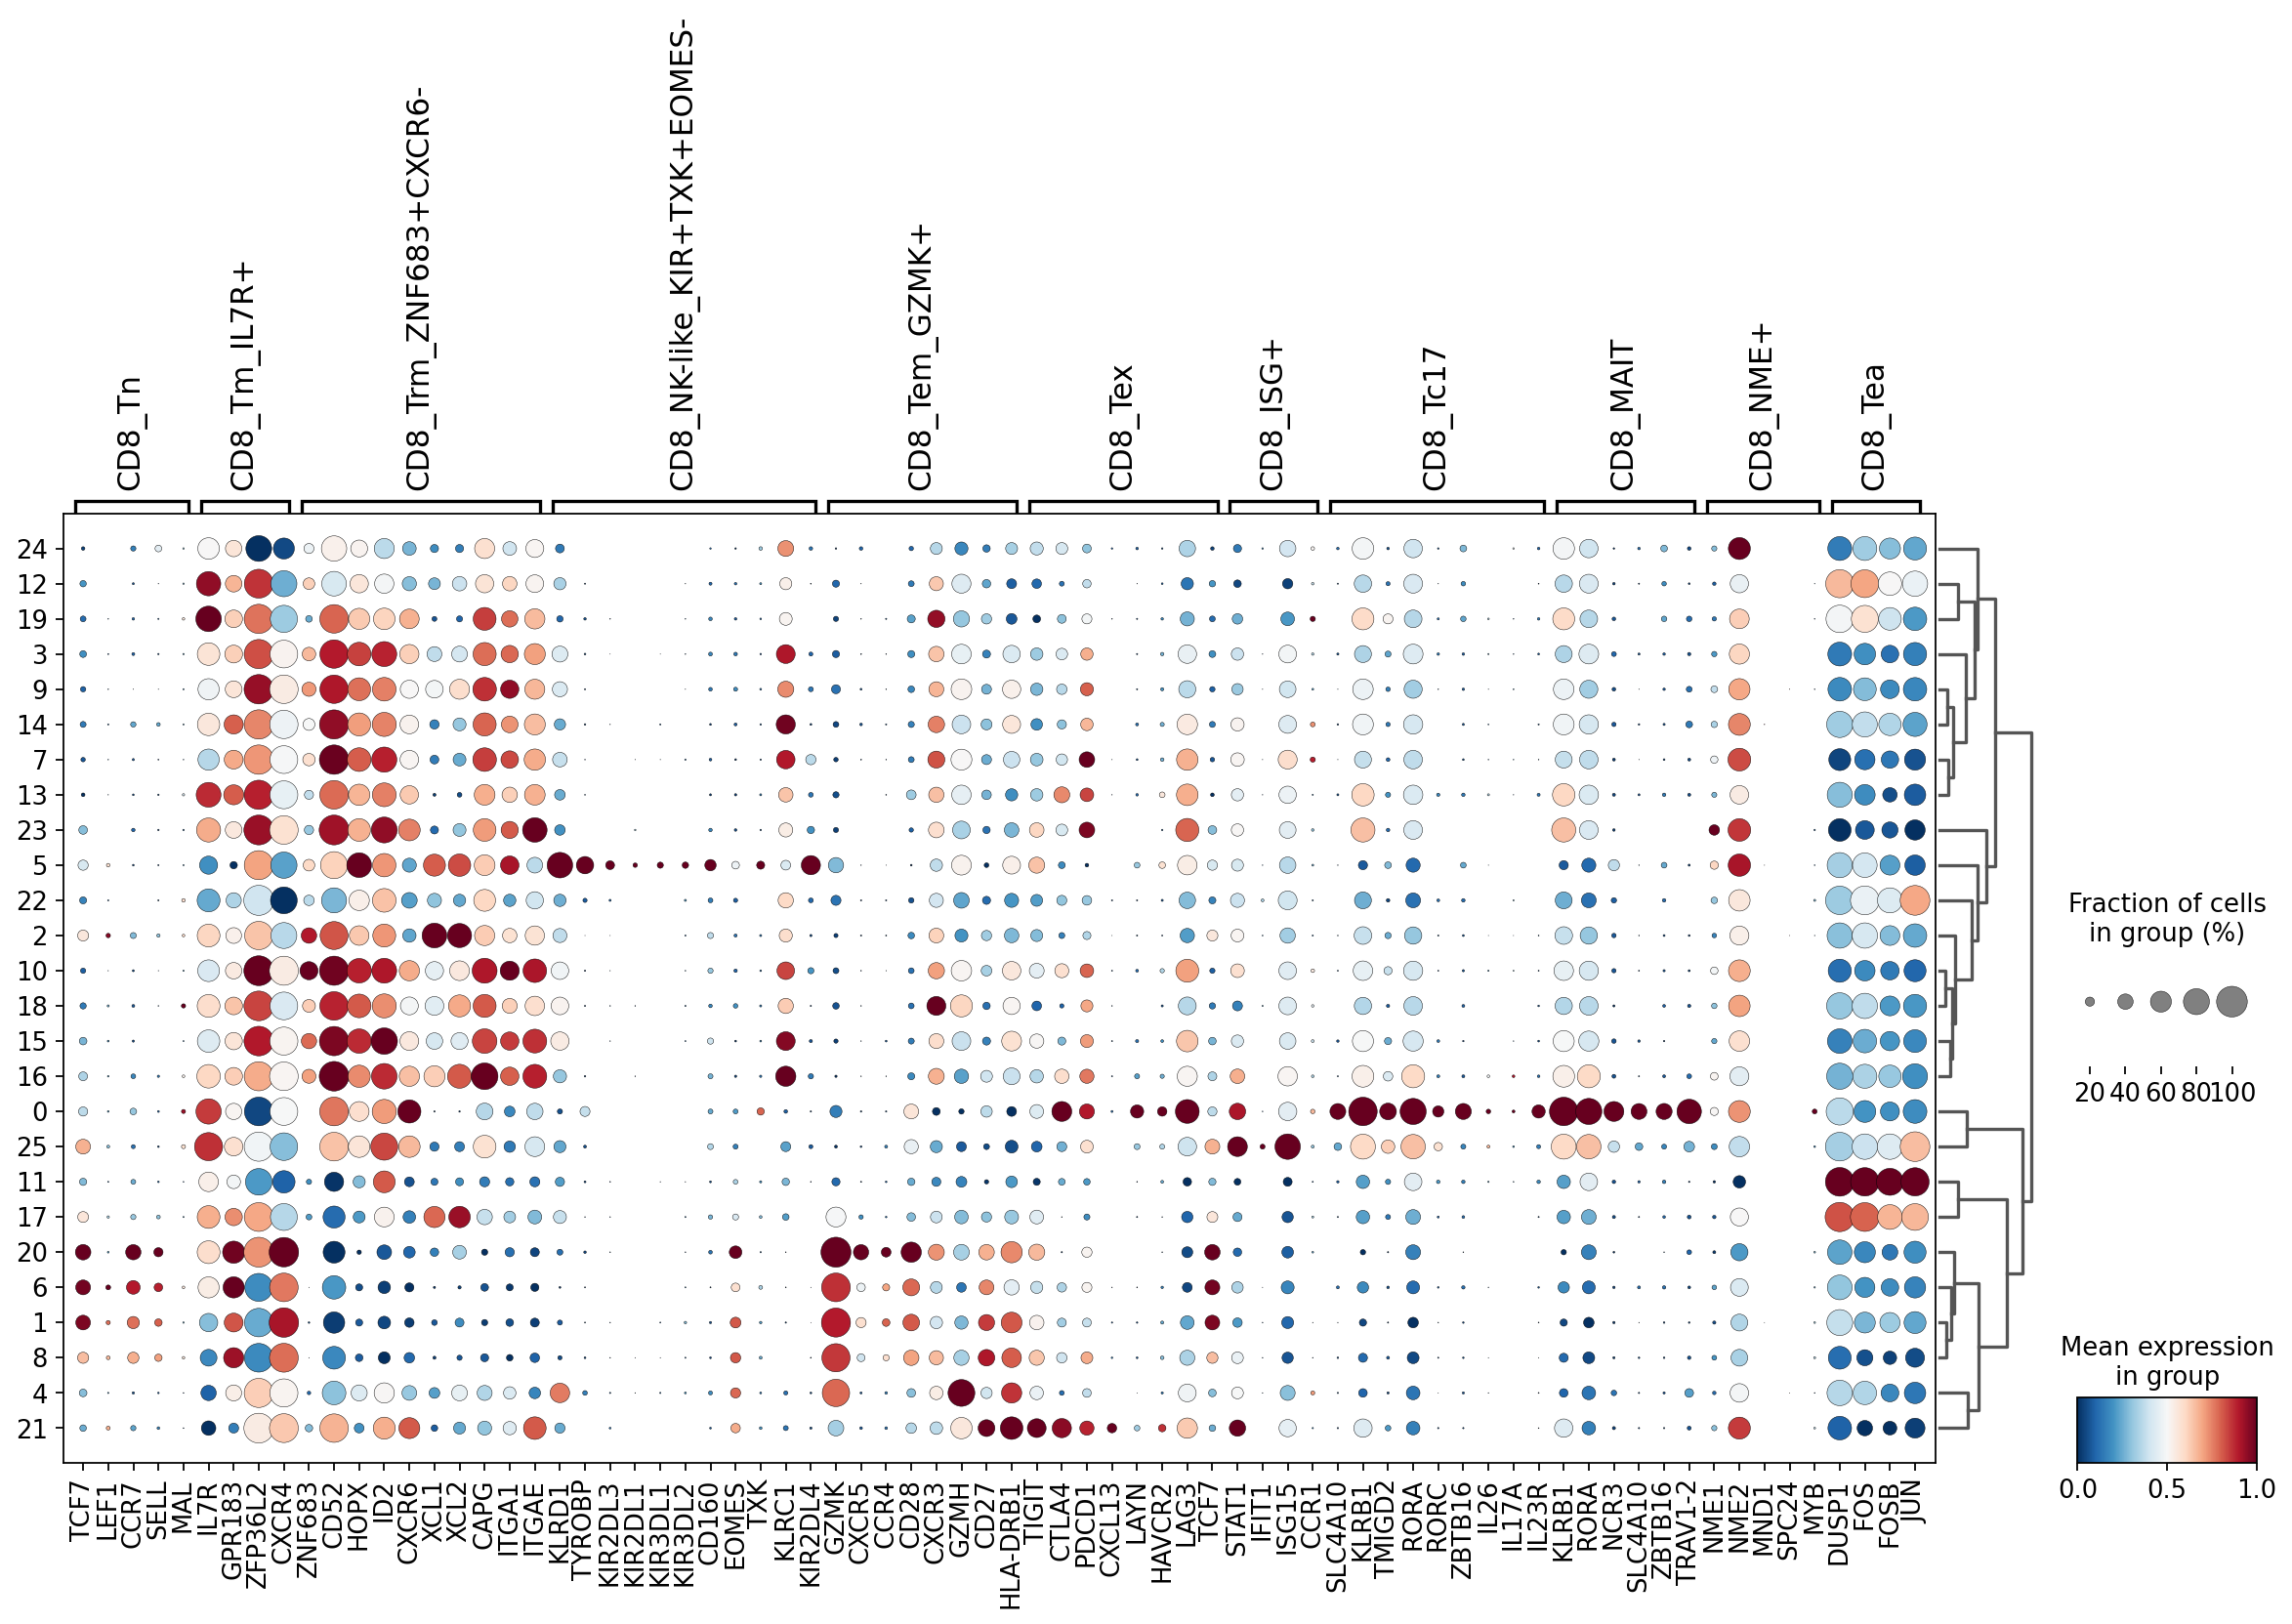

In [426]:
sc.tl.dendrogram(adata_CD8,groupby='leiden')

ax = sc.pl.dotplot(
    adata_CD8,
    marker_genes_dict,
    groupby='leiden',
    dendrogram=True,
    color_map="RdBu_r",
    swap_axes=False,
    use_raw=True,
    standard_scale="var",
    var_group_labels=False, 
    figsize=(18,8),
    return_fig=False,
    show=False,
)


In [456]:
type_color_rna={
    '0':'CD8.MAIT',
    '1':'CD8.GZMK+.early_Tem',
    '2':'CD8.ZNF683+CXCR6-.Trm',
    '3':'CD8.ZNF683+CXCR6+.Trm',
    '4':'CD8.GZMK+.Tem',
    '5':'CD8.KLRD1+TYROBP+.NK-like',
    '6':'CD8.GZMK+.Tn',
    '7':'CD8.ZNF683+CXCR6+.Trm',
    '8':'CD8.GZMK+.early_Tem',
    '9':'CD8.ZNF683+CXCR6+.Trm',
    '10':'CD8.ZNF683+CXCR6+.Trm',
    '11':'CD8.FOS+JUN+.T-early_response',
    '12':'CD8.FOS+IL7R+.T-early_response',
    '13':'CD8.ZNF683-CXCR6+.Trm',
    '14':'CD8.ZNF683+CXCR6+.Trm',
    '15':'CD8.ZNF683+CXCR6+.Trm',
    '16':'CD8.ZNF683+CXCR6+.Trm',
    '17':'CD8.FOS+JUN+.T-early_response',
    '18':'CD8.ZNF683+CXCR6+.Trm',
    '19':'CD8.ZNF683-CXCR6+.Trm',
    '20':'CD8.GZMK+.early_Tem',
    '21':'CD8.CXCL13+.Termianl_Tex',
    '22':'CD8.ZNF683+CXCR6-.Trm',
    '23':'CD8.ZNF683-CXCR6+.Trm',
    '24':'CD8.ZNF683+CXCR6+.Trm',
    '25':'CD8.ISG+.T',
}
adata_CD8.obs['Subcelltype']=adata_CD8.obs['leiden'].map(type_color_rna).astype('category')

<AxesSubplot: title={'center': 'Subcelltype'}, xlabel='X_umap1', ylabel='X_umap2'>

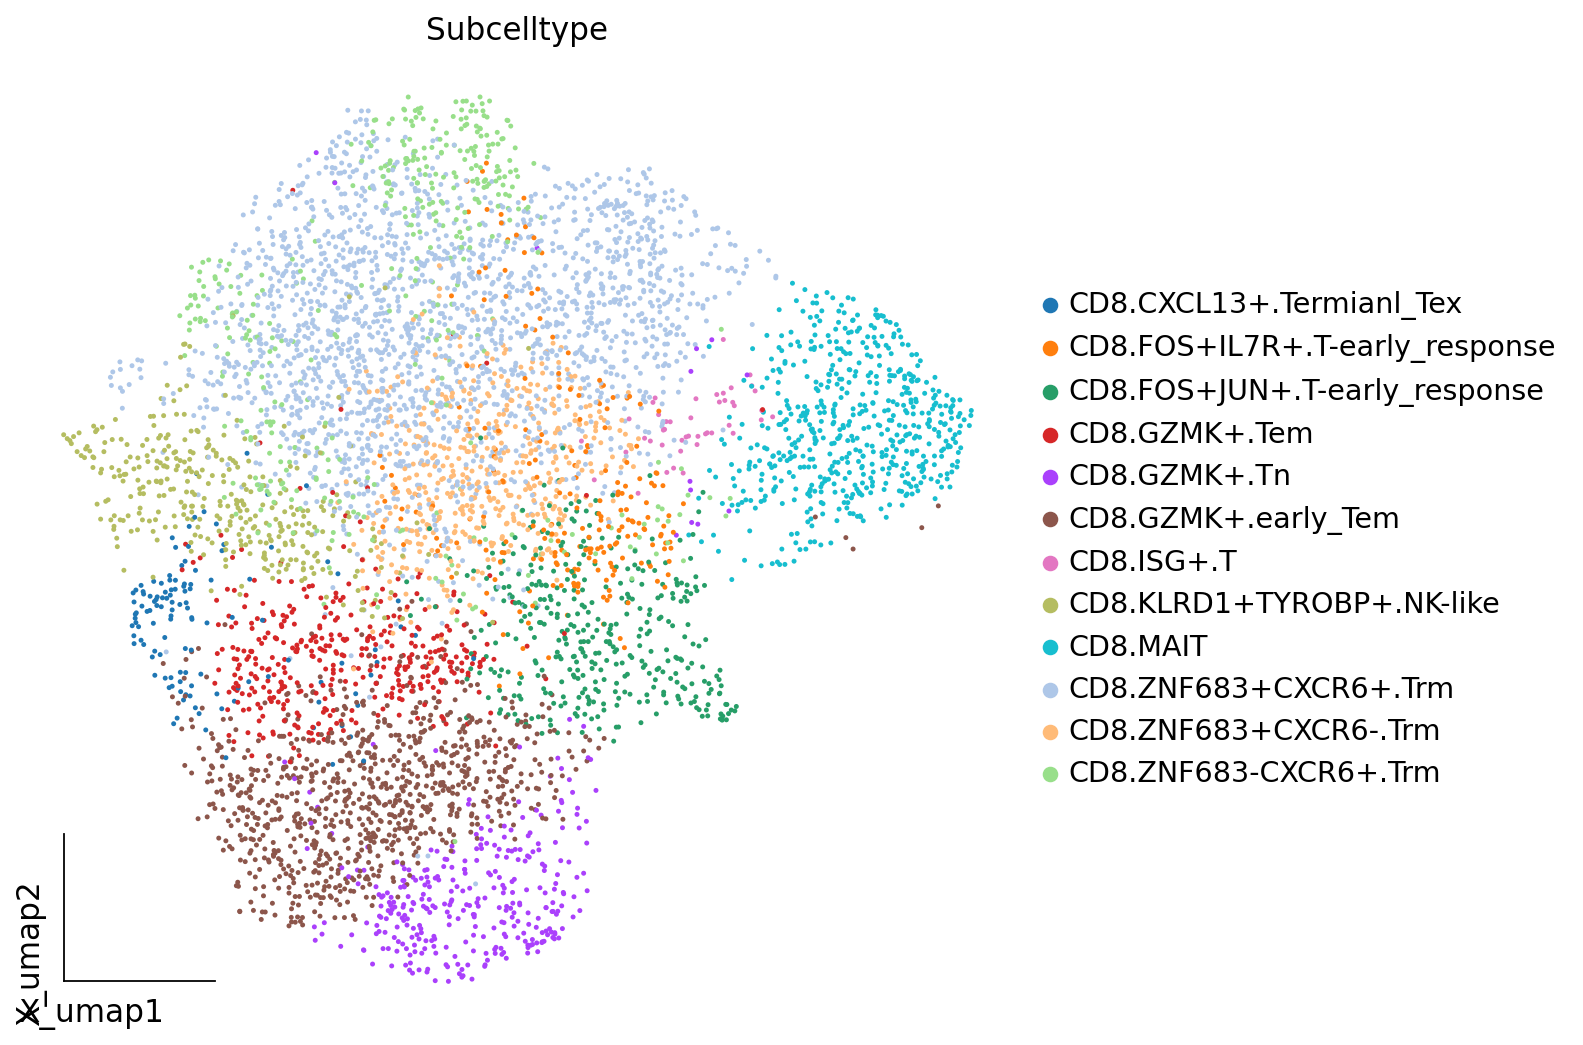

In [457]:
fig, ax = plt.subplots(figsize=(8,8))
ov.utils.embedding(adata_CD8,
                basis='X_umap',frameon='small',
                color=['Subcelltype'],show=False,ax=ax,size=20)

In [458]:
adata_CD8.obs['Subcelltype'] = adata_CD8.obs['Subcelltype'].cat.set_categories(['CD8.GZMK+.Tn',
                                                                                'CD8.GZMK+.early_Tem',
                                                                                'CD8.GZMK+.Tem',
                                                                                'CD8.CXCL13+.Termianl_Tex',
                                                                                'CD8.FOS+JUN+.T-early_response',
                                                                                'CD8.FOS+IL7R+.T-early_response',
                                                                                'CD8.ISG+.T',
                                                                                'CD8.MAIT',
                                                                                'CD8.ZNF683+CXCR6-.Trm',
                                                                                'CD8.ZNF683+CXCR6+.Trm',
                                                                                'CD8.ZNF683-CXCR6+.Trm',
                                                                                'CD8.KLRD1+TYROBP+.NK-like',
                                                                               ])

In [459]:
adata_CD8.uns['Subcelltype_colors'] = ov.pl.green_color[0:4] + ov.pl.red_color[0:4] +  ov.pl.blue_color[0:4]


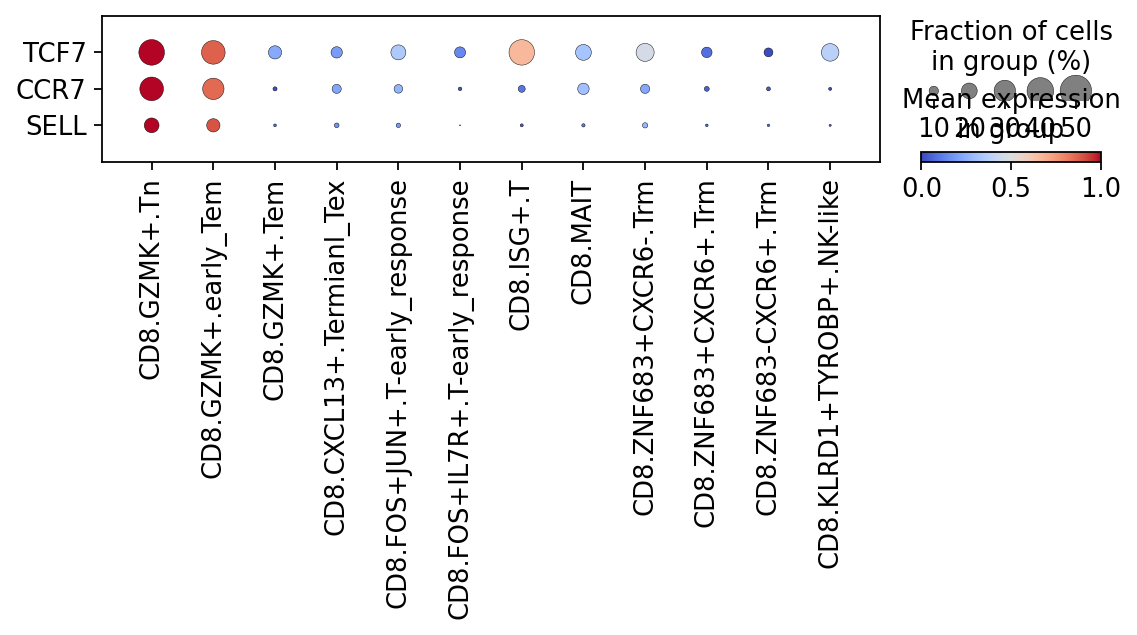

In [460]:
marker_genes_list = ['TCF7','CCR7','SELL']
    

#sc.tl.dendrogram(adata_CD8,groupby='Subcelltype')

ax = sc.pl.dotplot(
    adata_CD8,
    marker_genes_list,
    groupby='Subcelltype',
    dendrogram=False,
    color_map="coolwarm",
    swap_axes=True,
    use_raw=True,
    standard_scale="var",
    var_group_labels=True, 
    figsize=(8,1.2),
    return_fig=False,
    show=False,
    dot_max=0.5,
)
plt.savefig('Gastric/Figure/sFigure3/CD8_Marker_1.png', dpi=300,bbox_inches = 'tight')


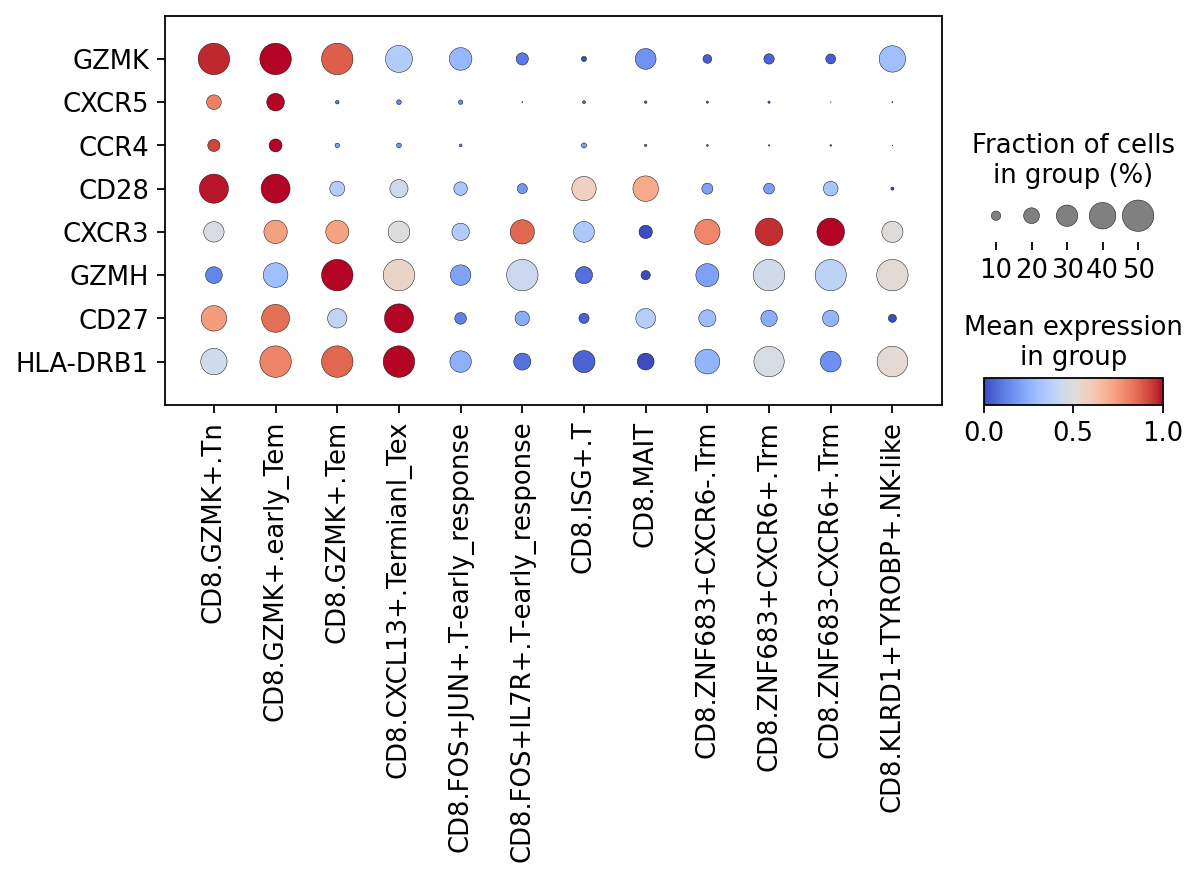

In [462]:
marker_genes_list = ['GZMK','CXCR5','CCR4','CD28','CXCR3','GZMH','CD27','HLA-DRB1']
    

#sc.tl.dendrogram(adata_CD8,groupby='Subcelltype')

ax = sc.pl.dotplot(
    adata_CD8,
    marker_genes_list,
    groupby='Subcelltype',
    dendrogram=False,
    color_map="coolwarm",
    swap_axes=True,
    use_raw=True,
    standard_scale="var",
    var_group_labels=True, 
    figsize=(8,3.2),
    return_fig=False,
    show=False,
    dot_max=0.5,
)
plt.savefig('Gastric/Figure/sFigure3/CD8_Marker_2.png', dpi=300,bbox_inches = 'tight')


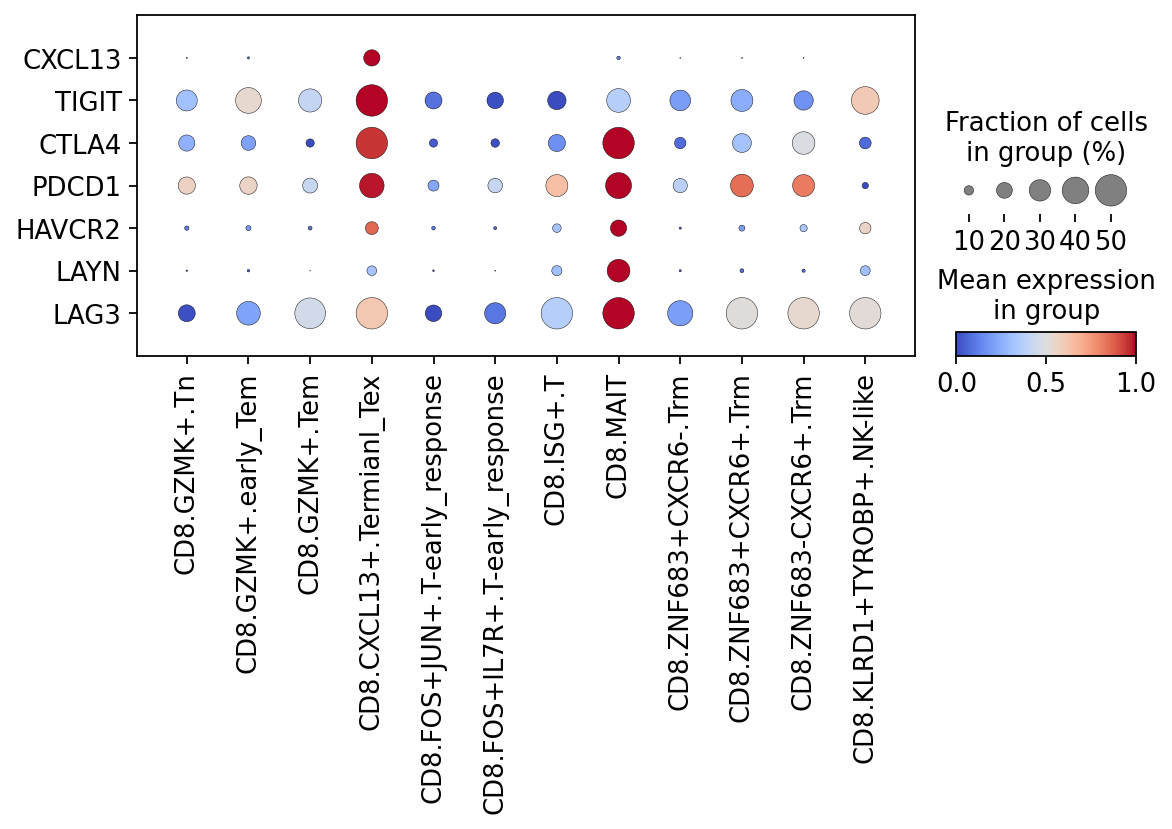

In [463]:
marker_genes_list = ['CXCL13','TIGIT','CTLA4','PDCD1','HAVCR2','LAYN','LAG3',]
    

#sc.tl.dendrogram(adata_CD8,groupby='Subcelltype')

ax = sc.pl.dotplot(
    adata_CD8,
    marker_genes_list,
    groupby='Subcelltype',
    dendrogram=False,
    color_map="coolwarm",
    swap_axes=True,
    use_raw=True,
    standard_scale="var",
    var_group_labels=True, 
    figsize=(8,2.8),
    return_fig=False,
    show=False,
    dot_max=0.5,
)
plt.savefig('Gastric/Figure/sFigure3/CD8_Marker_3.png', dpi=300,bbox_inches = 'tight')


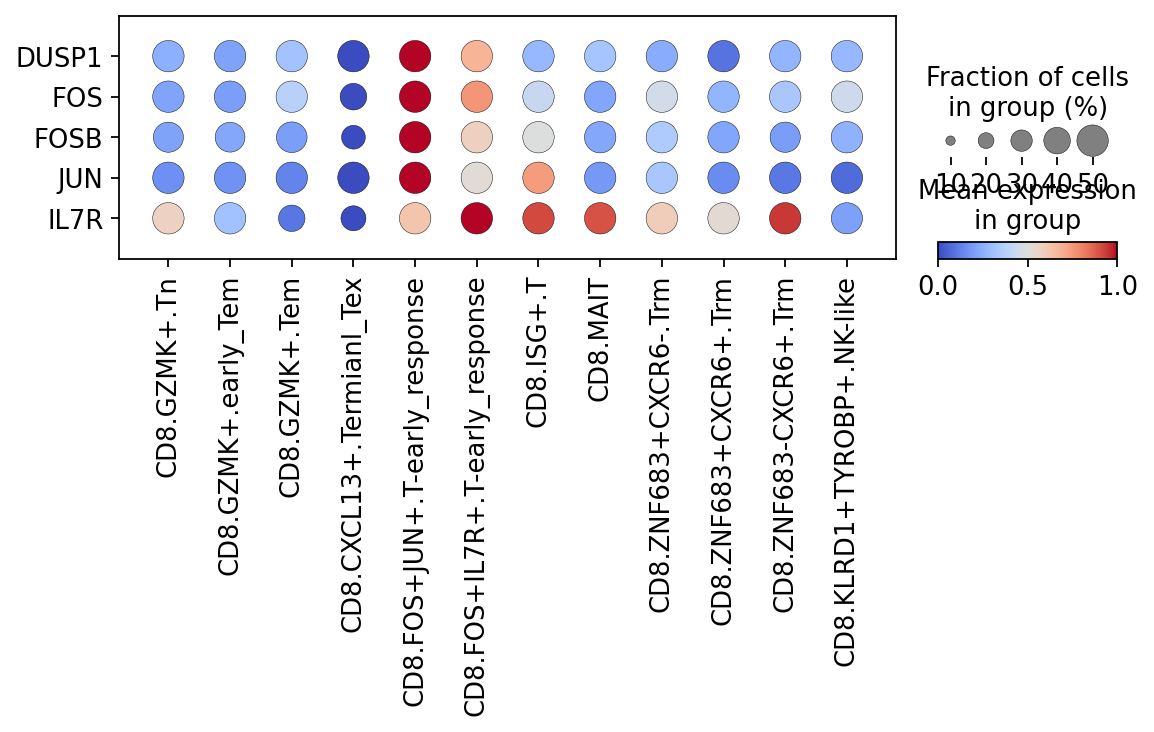

In [464]:
marker_genes_list = ['DUSP1','FOS','FOSB','JUN','IL7R']
    

#sc.tl.dendrogram(adata_CD8,groupby='Subcelltype')

ax = sc.pl.dotplot(
    adata_CD8,
    marker_genes_list,
    groupby='Subcelltype',
    dendrogram=False,
    color_map="coolwarm",
    swap_axes=True,
    use_raw=True,
    standard_scale="var",
    var_group_labels=True, 
    figsize=(8,2.0),
    return_fig=False,
    show=False,
    dot_max=0.5,
)
plt.savefig('Gastric/Figure/sFigure3/CD8_Marker_4.png', dpi=300,bbox_inches = 'tight')


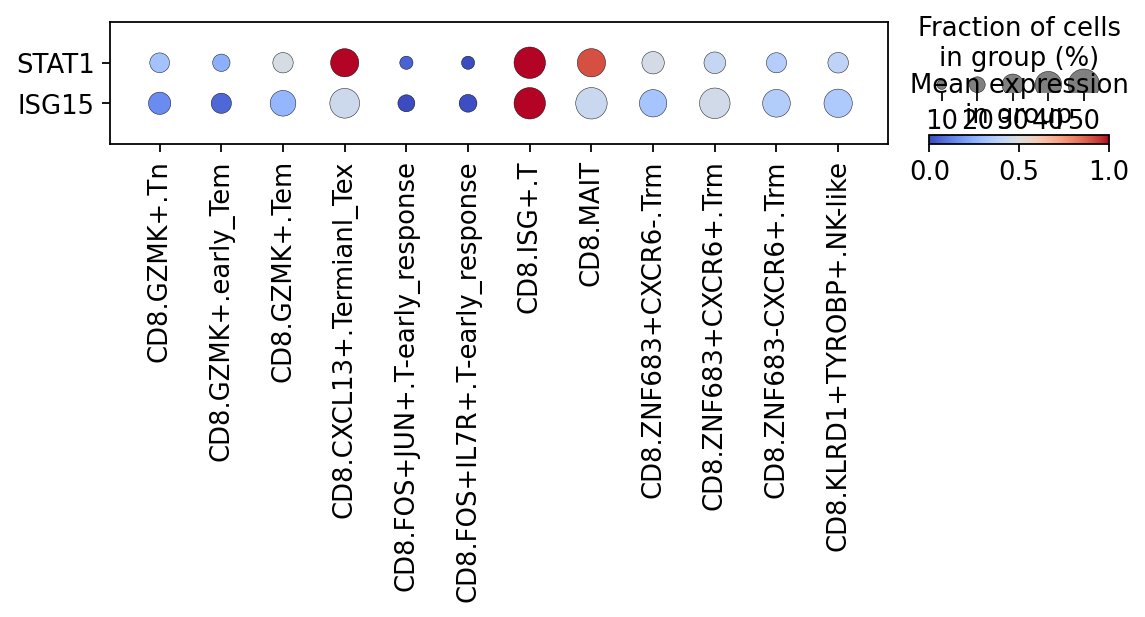

In [465]:
marker_genes_list = ['STAT1','ISG15']

#sc.tl.dendrogram(adata_CD8,groupby='Subcelltype')

ax = sc.pl.dotplot(
    adata_CD8,
    marker_genes_list,
    groupby='Subcelltype',
    dendrogram=False,
    color_map="coolwarm",
    swap_axes=True,
    use_raw=True,
    standard_scale="var",
    var_group_labels=True, 
    figsize=(8,1),
    return_fig=False,
    show=False,
    dot_max=0.5,
)
plt.savefig('Gastric/Figure/sFigure3/CD8_Marker_5.png', dpi=300,bbox_inches = 'tight')


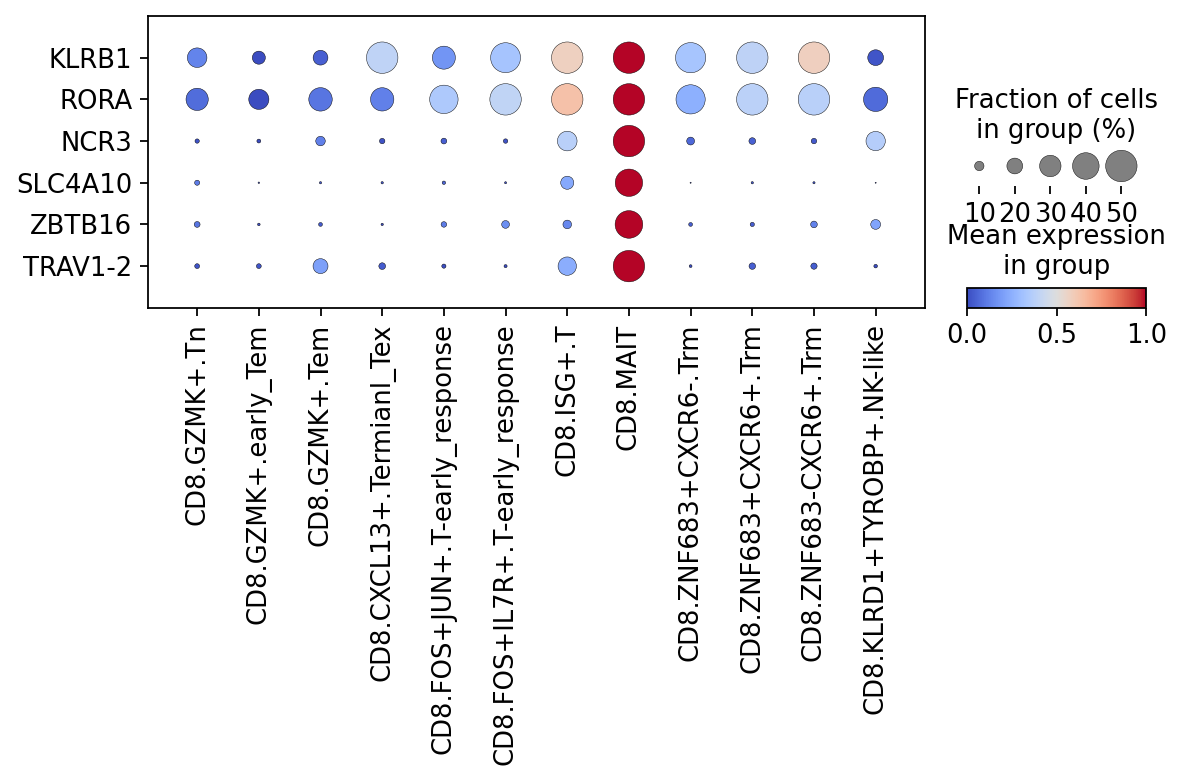

In [466]:
marker_genes_list = ['KLRB1','RORA','NCR3','SLC4A10','ZBTB16','TRAV1-2']

#sc.tl.dendrogram(adata_CD8,groupby='Subcelltype')

ax = sc.pl.dotplot(
    adata_CD8,
    marker_genes_list,
    groupby='Subcelltype',
    dendrogram=False,
    color_map="coolwarm",
    swap_axes=True,
    use_raw=True,
    standard_scale="var",
    var_group_labels=True,
    figsize=(8,2.4),
    return_fig=False,
    show=False,
    dot_max=0.5,
)
plt.savefig('Gastric/Figure/sFigure3/CD8_Marker_6.png', dpi=300,bbox_inches = 'tight')


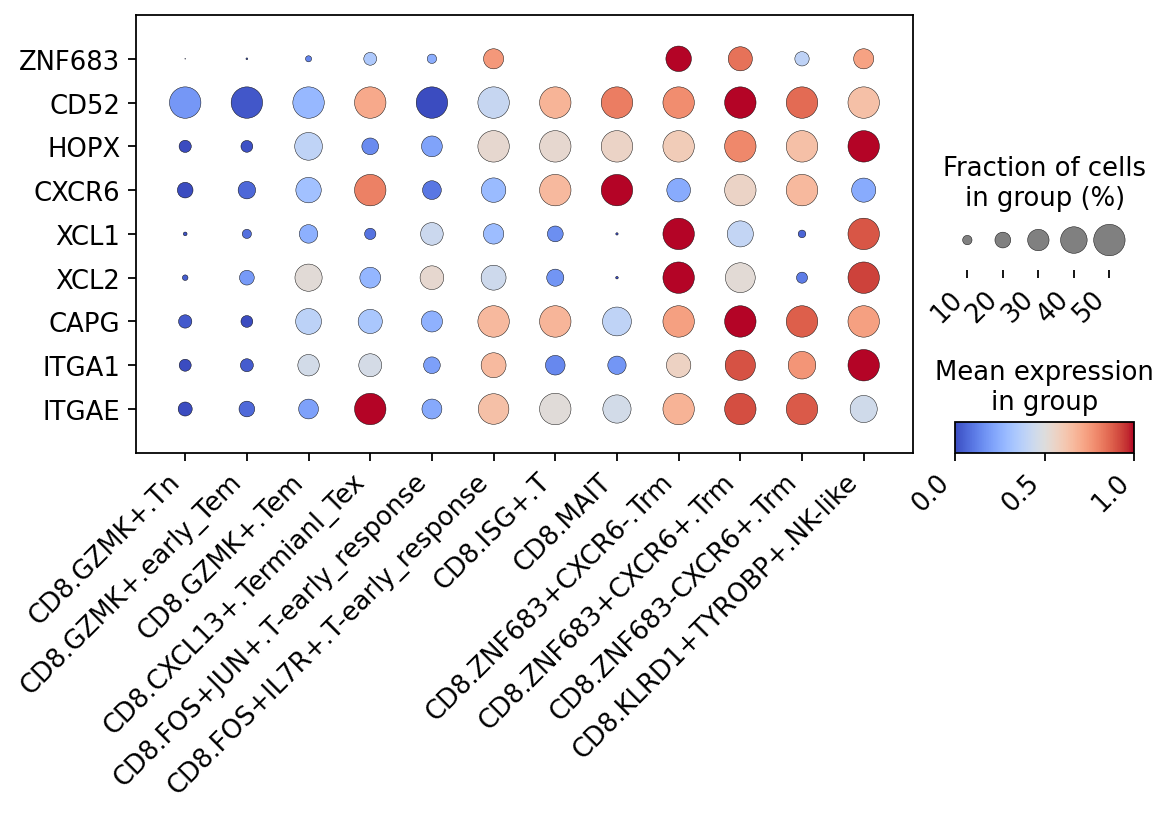

In [467]:
marker_genes_list = ['ZNF683','CD52','HOPX','CXCR6','XCL1','XCL2','CAPG','ITGA1','ITGAE']
    

#sc.tl.dendrogram(adata_CD8,groupby='Subcelltype')

ax = sc.pl.dotplot(
    adata_CD8,
    marker_genes_list,
    groupby='Subcelltype',
    dendrogram=False,
    color_map="coolwarm",
    swap_axes=True,
    use_raw=True,
    standard_scale="var",
  #  var_group_labels=True, 
    figsize=(8,3.6),
    return_fig=False,
    show=False,
    dot_max=0.5,
)

import scanpy as sc
import matplotlib.pyplot as plt

for ax in ax.values():  
    labels = [item.get_text() for item in ax.get_xticklabels()]
    ax.set_xticklabels(labels, rotation=45, ha='right')


plt.savefig('Gastric/Figure/sFigure3/CD8_Marker_7.png', dpi=300,bbox_inches = 'tight')


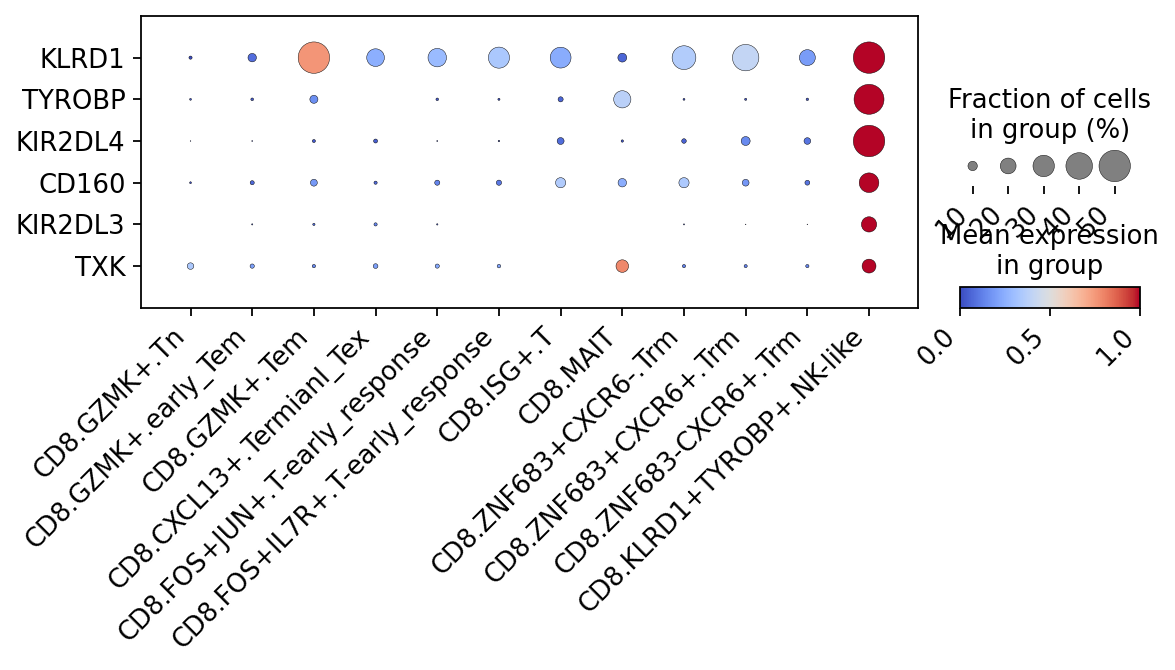

In [470]:
marker_genes_list = ['KLRD1','TYROBP','KIR2DL4','CD160','KIR2DL3','TXK',]

#sc.tl.dendrogram(adata_CD8,groupby='Subcelltype')

ax = sc.pl.dotplot(
    adata_CD8,
    marker_genes_list,
    groupby='Subcelltype',
    dendrogram=False,
    color_map="coolwarm",
    swap_axes=True,
    use_raw=True,
    standard_scale="var",
  #  var_group_labels=True, 
    figsize=(8,2.4),
    return_fig=False,
    show=False,
    dot_max=0.5,
)

import scanpy as sc
import matplotlib.pyplot as plt


for ax in ax.values():  
    labels = [item.get_text() for item in ax.get_xticklabels()]
    ax.set_xticklabels(labels, rotation=45, ha='right')


plt.savefig('Gastric/Figure/sFigure3/CD8_Marker_8.png', dpi=300,bbox_inches = 'tight')


# CD4 Annotation

In [9]:
adata_CD4 = adata[adata.obs['T/NK_type']=='CD4']
adata_CD4

View of AnnData object with n_obs × n_vars = 6816 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type'
    uns: 'Person_colors', 'Sample_colors', 'T', 'dendrogram_T', 'leiden', 'leiden_sizes', 'neighbors', 'paga', 'umap', 'T/NK_celltype_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [10]:
sc.pp.neighbors(adata_CD4, use_rep="X_scVI", metric="cosine",n_neighbors=15, random_state = 112)
sc.tl.leiden(adata_CD4,resolution=1.5)
sc.tl.paga(adata_CD4)
sc.pl.paga(adata_CD4, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata_CD4,init_pos='paga')

computing neighbors


2024-04-10 21:35:10.066004: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-10 21:35:18.705479: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-10 21:36:01.314866: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/slurm/lib:/opt/slurm/lib/slurm:/opt/slurm/lib:/opt/slurm/lib/slurm:/opt/slurm/lib:

    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:02:14)
running Leiden clustering
    finished: found 22 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:03)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)


In [11]:
marker_genes_dict = {
    'CD40LG':['CD40LG'],
    'FOXP3':['FOXP3'],
    'CD4.Tn':['TCF7','LEF1','TXK','CCR7','SELL','MAL','CXCR5','ADSL','IL16','IL7R'],
    'CD4.TNF+.T':['TNF'],
    'CD4.Tm':['AREG','TIMP1','CREM','CCL5','CAPG','GZMK','KLRG1','CX3CR1','TBX21',],
    'CD4.Th17':['RORA','RORC','CCR6','IL23R','IL22','IL17A','IL17F','IL26'],
    'CD4.Tfh':['TOX','TOX2','CXCR5','ICOS','IL21','CXCL13','GNG4','CD200','BCL6','ZBED2','CCL3','CCL4','IFNG','GZMB','LAG3','HAVCR2'],
    'CD4.Treg':['RTKN2','IL2RA','S1PR1','TNFRSF9','CTLA4','LAYN','STAT1','IFIT1','IRF7','ISG15'],
    'CD4.NME1':['NME1','NME2','MND1','SPC24','CCR4',],
}

    using 'X_pca' with n_pcs = 100
Storing dendrogram info using `.uns['dendrogram_leiden']`
categories: 0, 1, 2, etc.
var_group_labels: CD40LG, FOXP3, CD4.Tn, etc.


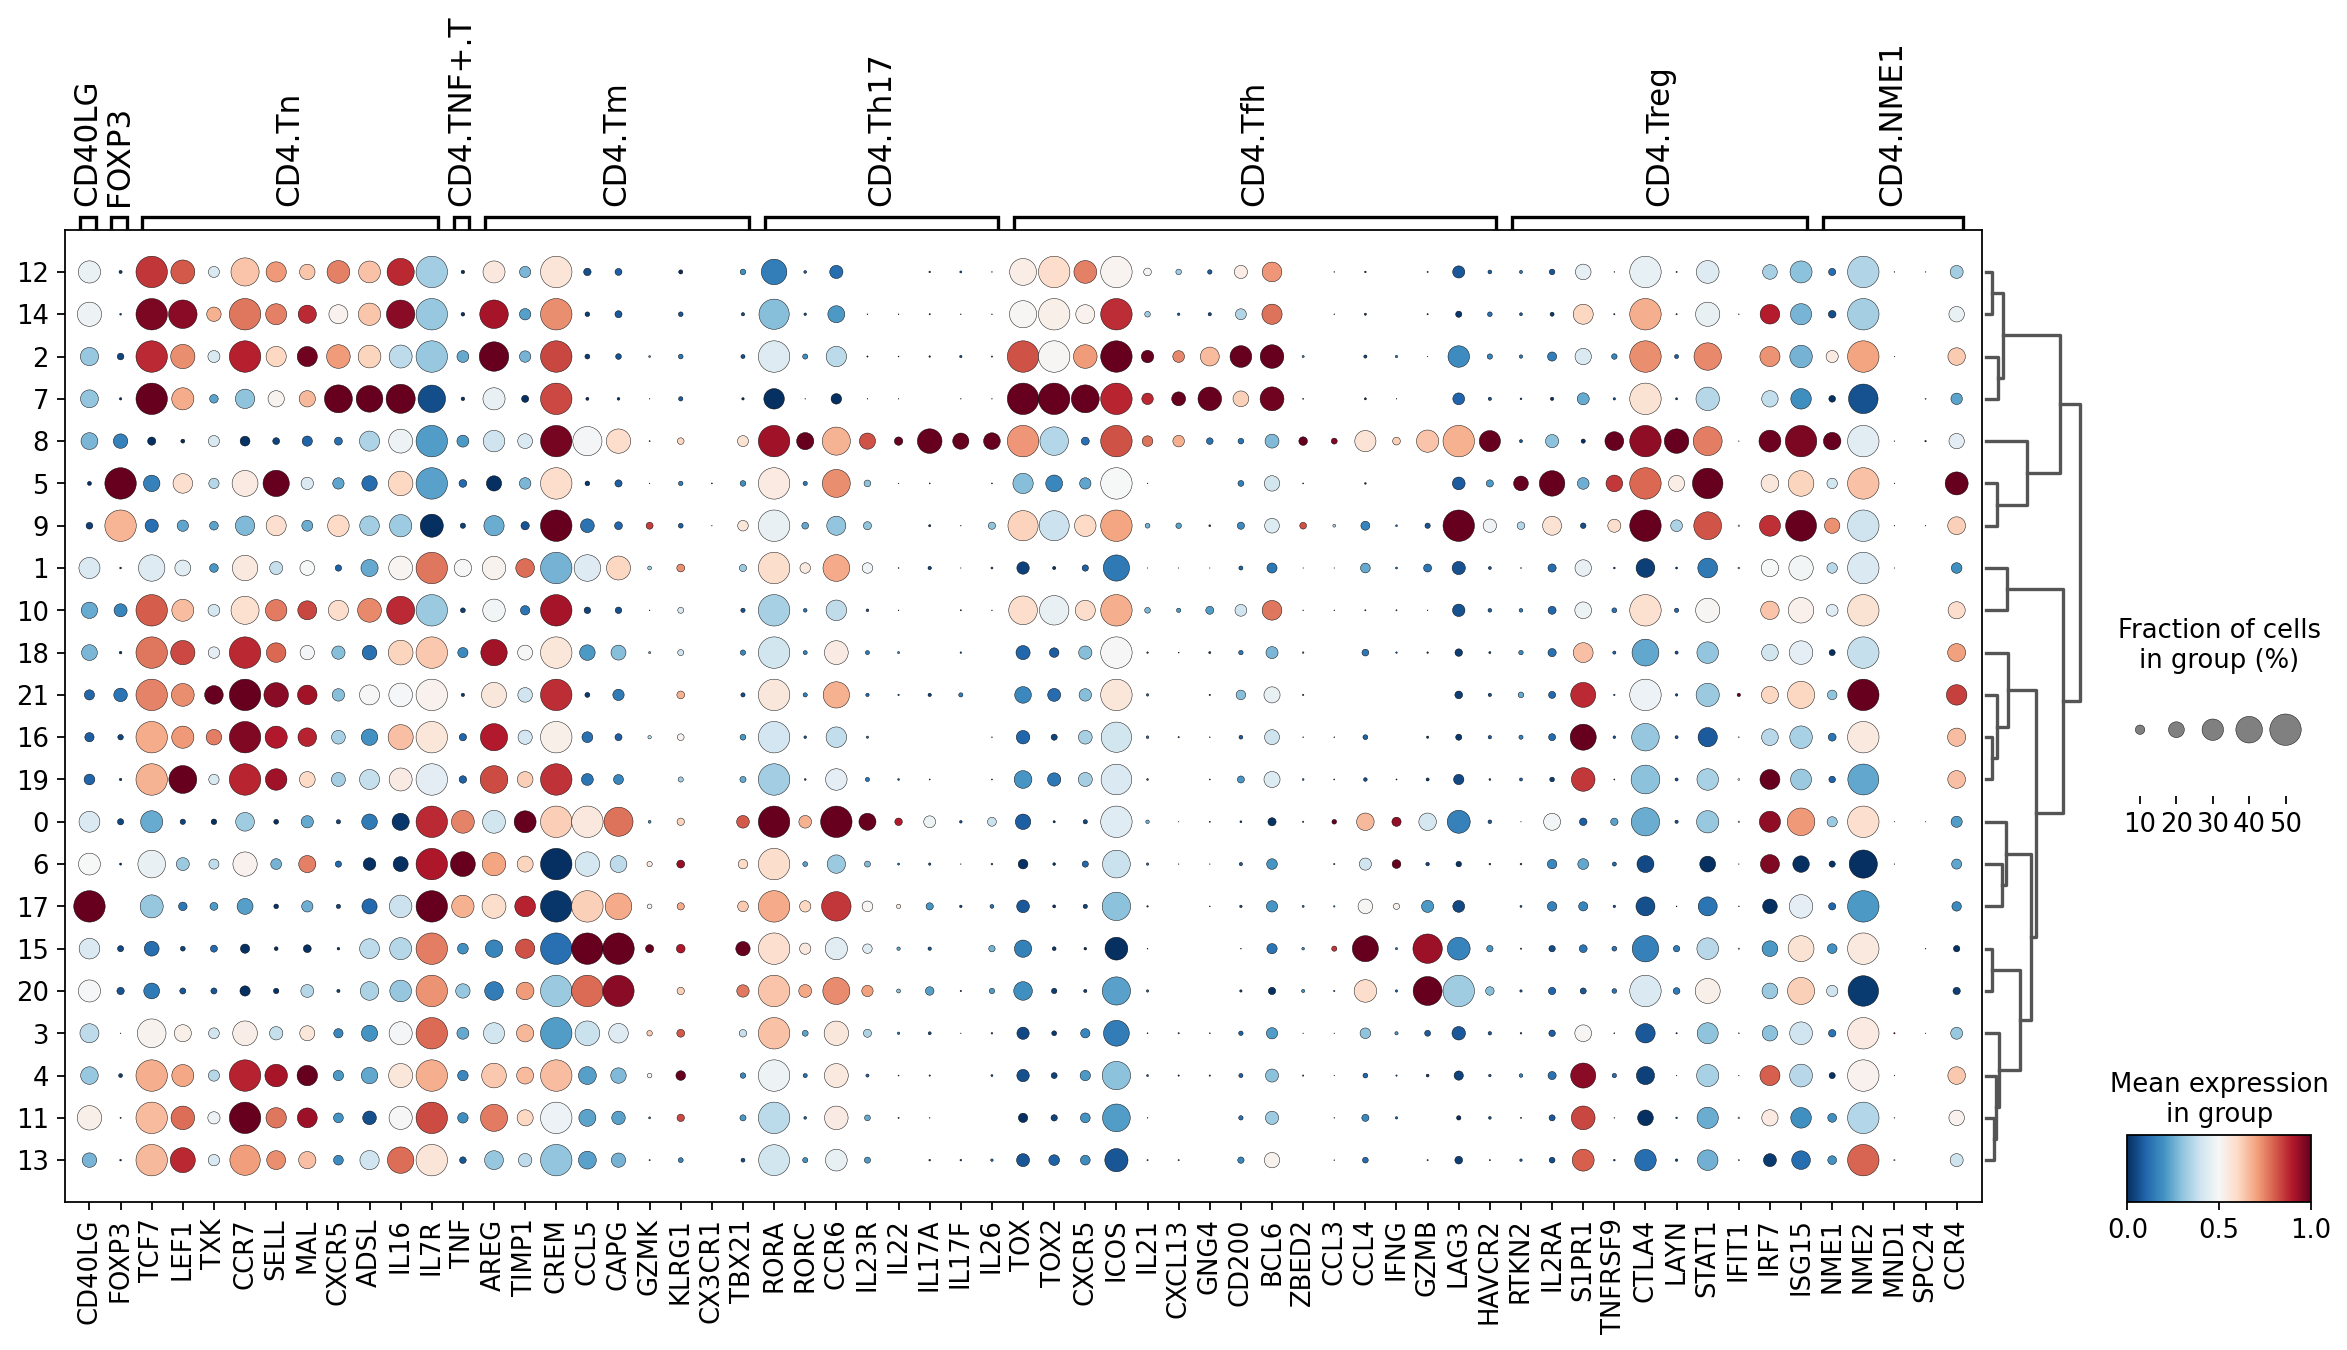

In [12]:
sc.tl.dendrogram(adata_CD4,groupby='leiden')

ax = sc.pl.dotplot(
    adata_CD4,
    marker_genes_dict,
    groupby='leiden',
    dendrogram=True,
    color_map="RdBu_r",
    swap_axes=False,
    use_raw=True,
    standard_scale="var",
    var_group_labels=False, 
    figsize=(18,8),
    return_fig=False,
    show=False,
    dot_max=0.5,
)


In [51]:
type_color_rna={
    '0':'CD4.CAPG+.Tm',
    '1':'CD4.TMP1+.Tm',
    '2':'CD4.IL21+.Tfh',
    '3':'CD4.TMP1+.Tm',
    '4':'CD4.Tn',
    '5':'CD4.TNFRSF9+.Treg',
    '6':'CD4.TNF+.T',
    '7':'CD4.TOX2+.Tfh',
    '8':'CD4.IL26+.Th17',
    '9':'CD4.LAG3+.Treg',
    '10':'CD4.ADSL+.Tn',
    '11':'CD4.Tn',
    '12':'CD4.Tn',
    '13':'CD4.Tn',
    '14':'CD4.Tn',
    '15':'CD4.CAPG+CREM-.Tm',
    '16':'CD4.Tn',
    '17':'CD4.TNF+.T',
    '18':'CD4.Tn',
    '19':'CD4.Tn',
    '20':'CD4.CAPG+CREM-.Tm',
    '21':'CD4.Tn',
}
adata_CD4.obs['Subcelltype']=adata_CD4.obs['leiden'].map(type_color_rna).astype('category')

In [52]:
set(adata_CD4.obs['Subcelltype'])

{'CD4.ADSL+.Tn',
 'CD4.CAPG+.Tm',
 'CD4.CAPG+CREM-.Tm',
 'CD4.IL21+.Tfh',
 'CD4.IL26+.Th17',
 'CD4.LAG3+.Treg',
 'CD4.TMP1+.Tm',
 'CD4.TNF+.T',
 'CD4.TNFRSF9+.Treg',
 'CD4.TOX2+.Tfh',
 'CD4.Tn'}

In [53]:
adata_CD4.obs['Subcelltype'] = adata_CD4.obs['Subcelltype'].cat.set_categories(['CD4.Tn',
                                                                                'CD4.ADSL+.Tn',
                                                                                'CD4.TNF+.T',
                                                                                'CD4.TMP1+.Tm',
                                                                                'CD4.CAPG+CREM-.Tm',
                                                                                'CD4.CAPG+.Tm',  
                                                                                'CD4.IL26+.Th17',
                                                                                'CD4.IL21+.Tfh',
                                                                                'CD4.TOX2+.Tfh',
                                                                                'CD4.LAG3+.Treg',
                                                                                'CD4.TNFRSF9+.Treg',
                                                                               ])

<AxesSubplot: title={'center': 'Subcelltype'}, xlabel='X_umap1', ylabel='X_umap2'>

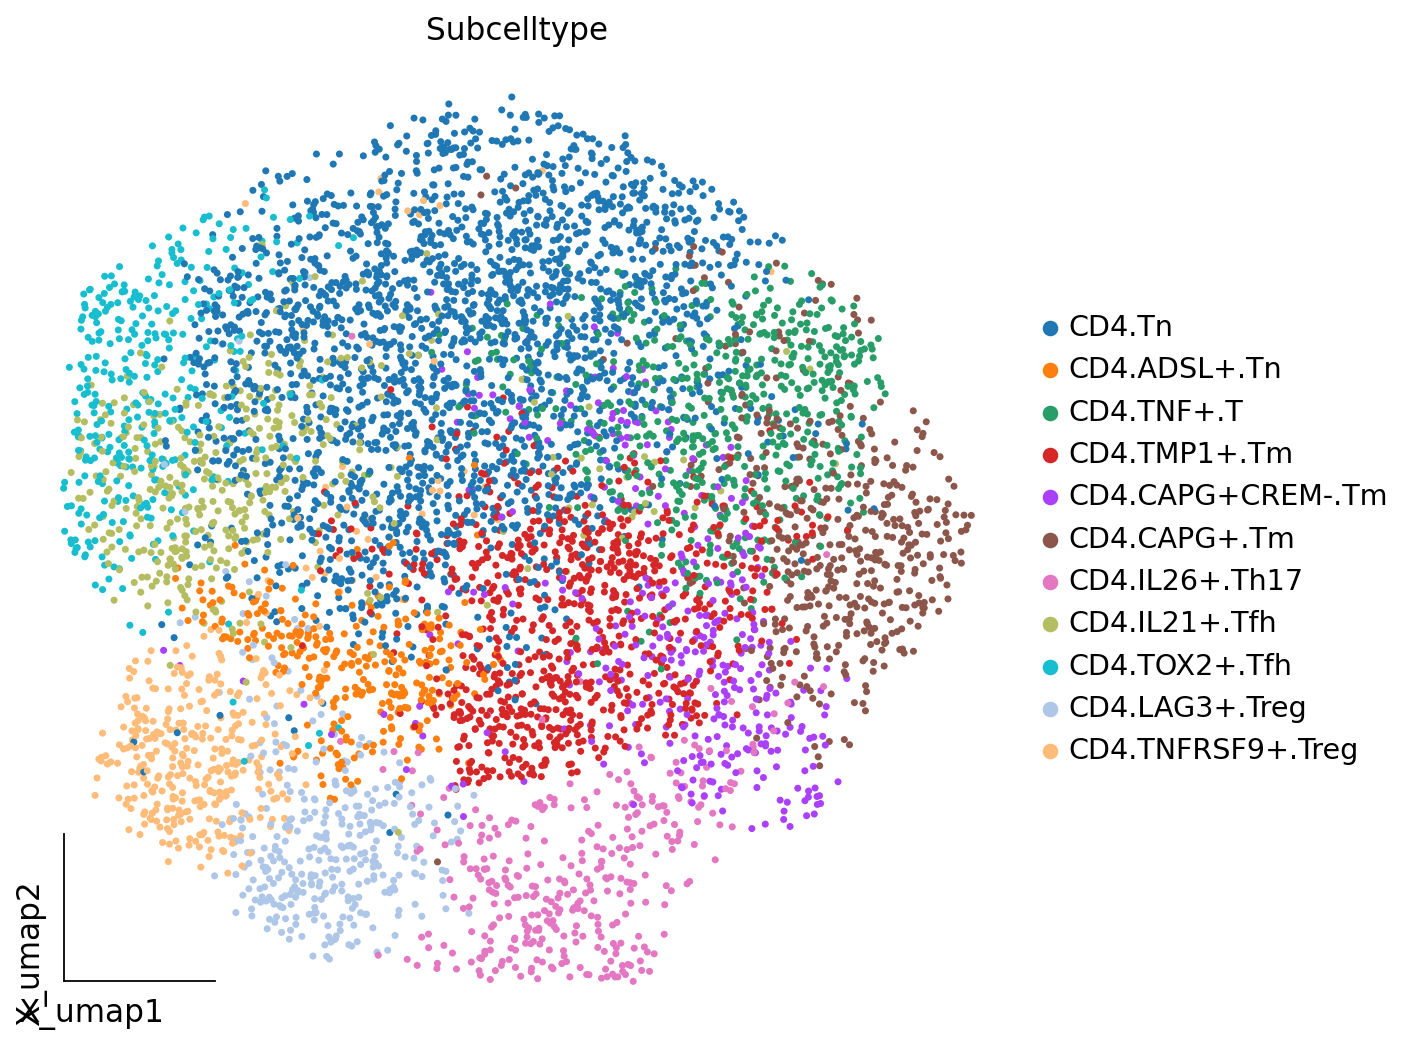

In [54]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,8))
ov.utils.embedding(adata_CD4,
                basis='X_umap',frameon='small',
                color=['Subcelltype'],show=False,ax=ax,size=40)

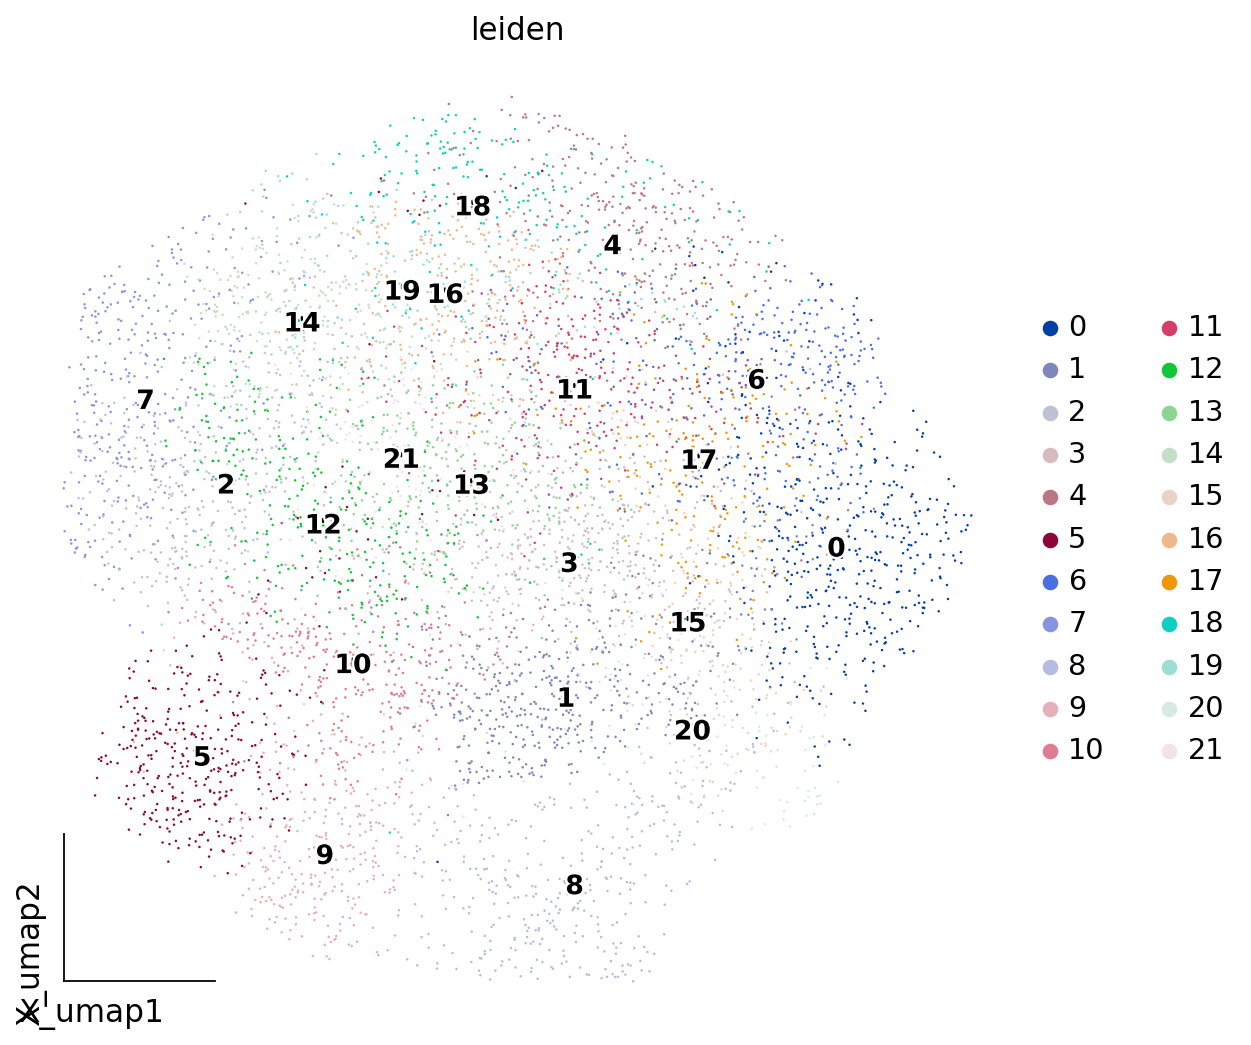

In [55]:
#平滑肌细胞
from matplotlib import patheffects

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,8))
ov.utils.embedding(adata_CD4,
                basis='X_umap',frameon='small',
                color=['leiden'],show=False,ax=ax,size=5)
ov.pl.embedding_adjust(
    adata_CD4,
    groupby='leiden',
    exclude=("OL",),  
    basis='X_umap',
    ax=ax,
    adjust_kwargs=dict(arrowprops=dict(arrowstyle='-', color='black')),
    text_kwargs=dict(fontsize=12 ,weight='bold',
                     path_effects=[patheffects.withStroke(linewidth=2, foreground='w')]),
)

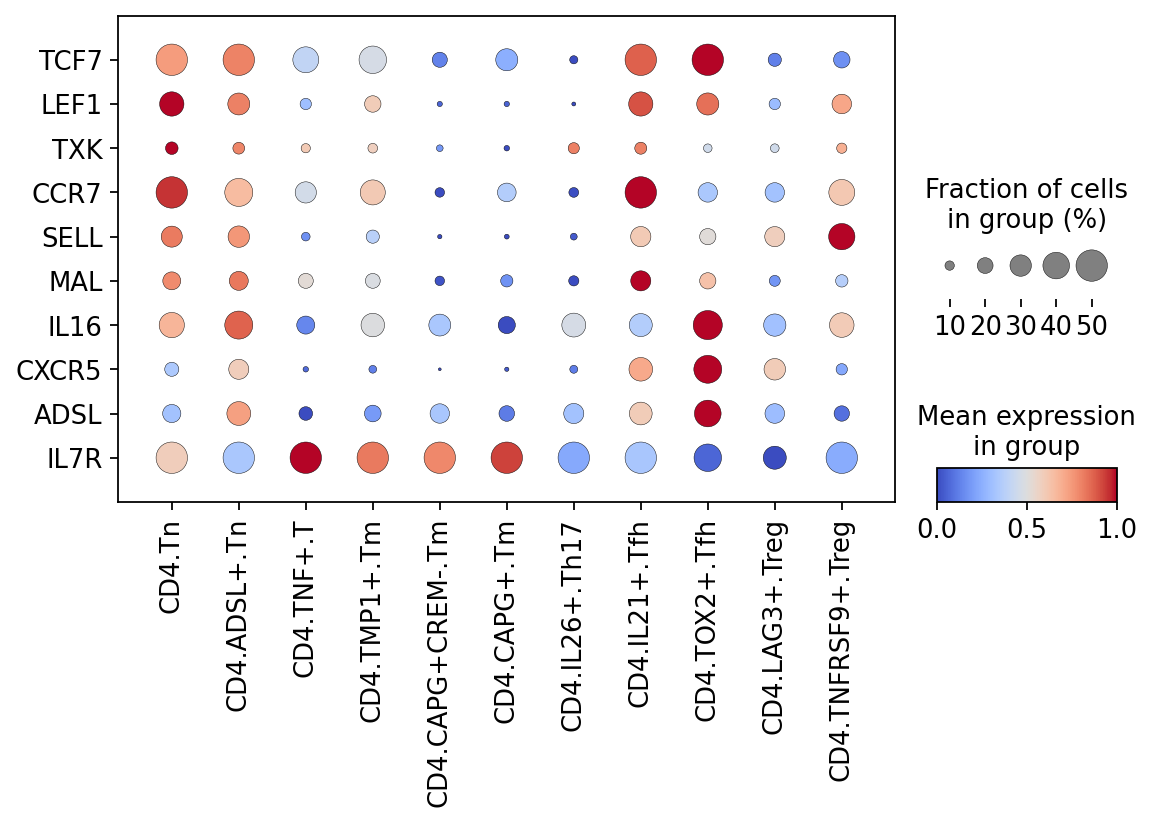

In [56]:
marker_genes_list = ['TCF7','LEF1','TXK','CCR7','SELL','MAL','IL16','CXCR5','ADSL','IL7R']
    

#sc.tl.dendrogram(adata_CD8,groupby='Subcelltype')

ax = sc.pl.dotplot(
    adata_CD4,
    marker_genes_list,
    groupby='Subcelltype',
    dendrogram=False,
    color_map="coolwarm",
    swap_axes=True,
    use_raw=True,
    standard_scale="var",
    var_group_labels=True, 
    figsize=(8,4),
    return_fig=False,
    show=False,
    dot_max=0.5,
)
plt.savefig('Gastric/Figure/sFigure3/CD4_Marker_1.png', dpi=300,bbox_inches = 'tight')


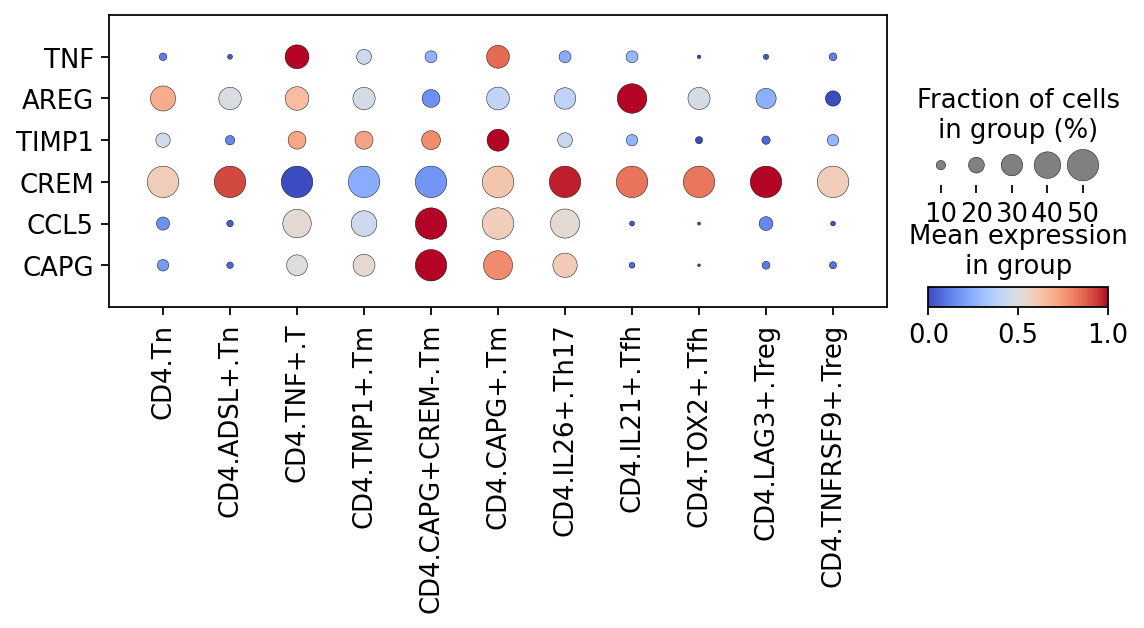

In [57]:
marker_genes_list = ['TNF','AREG','TIMP1','CREM','CCL5','CAPG']

#sc.tl.dendrogram(adata_CD8,groupby='Subcelltype')

ax = sc.pl.dotplot(
    adata_CD4,
    marker_genes_list,
    groupby='Subcelltype',
    dendrogram=False,
    color_map="coolwarm",
    swap_axes=True,
    use_raw=True,
    standard_scale="var",
    var_group_labels=True, 
    figsize=(8,2.4),
    return_fig=False,
    show=False,
    dot_max=0.5,
)
plt.savefig('Gastric/Figure/sFigure3/CD4_Marker_2.png', dpi=300,bbox_inches = 'tight')

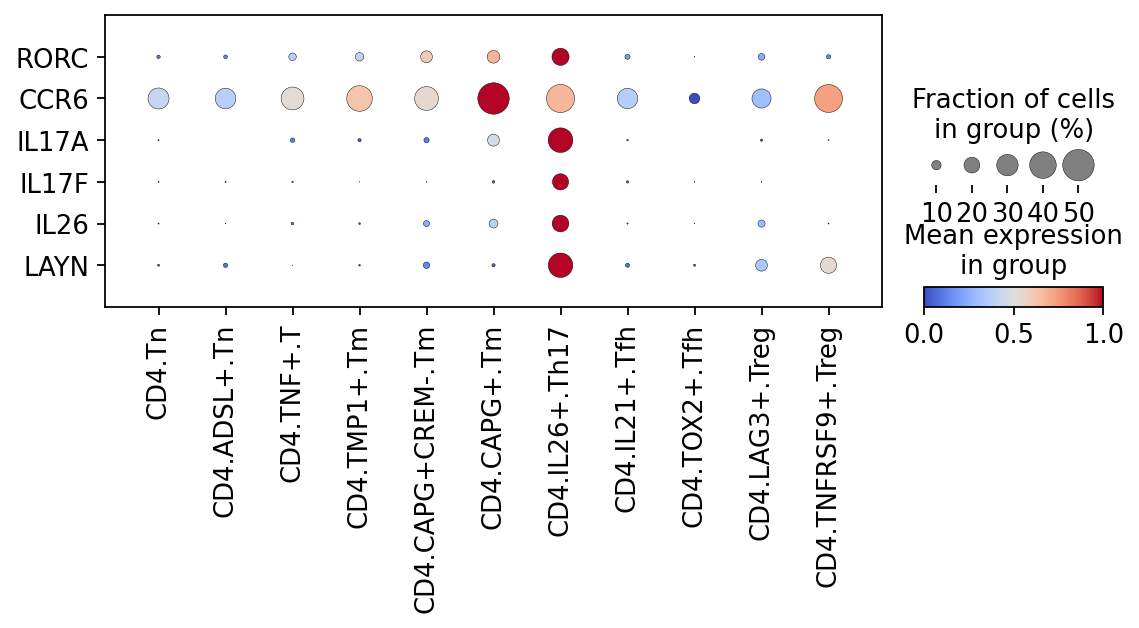

In [67]:
marker_genes_list = ['RORC','CCR6','IL17A','IL17F','IL26','LAYN']

#sc.tl.dendrogram(adata_CD8,groupby='Subcelltype')

ax = sc.pl.dotplot(
    adata_CD4,
    marker_genes_list,
    groupby='Subcelltype',
    dendrogram=False,
    color_map="coolwarm",
    swap_axes=True,
    use_raw=True,
    standard_scale="var",
    var_group_labels=True, 
    figsize=(8,2.4),
    return_fig=False,
    show=False,
    dot_max=0.5,
)
plt.savefig('Gastric/Figure/sFigure3/CD4_Marker_3.png', dpi=300,bbox_inches = 'tight')

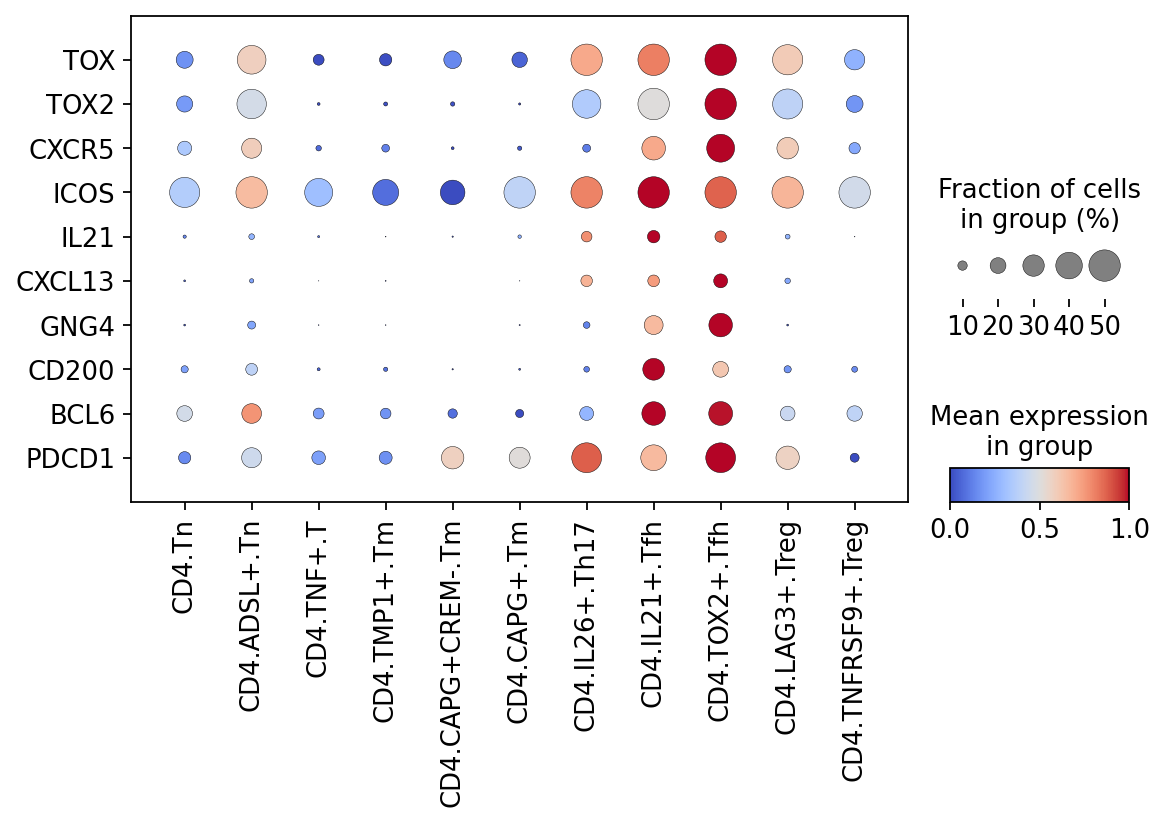

In [69]:
marker_genes_list = ['TOX','TOX2','CXCR5','ICOS','IL21','CXCL13','GNG4','CD200','BCL6','PDCD1']

#sc.tl.dendrogram(adata_CD8,groupby='Subcelltype')

ax = sc.pl.dotplot(
    adata_CD4,
    marker_genes_list,
    groupby='Subcelltype',
    dendrogram=False,
    color_map="coolwarm",
    swap_axes=True,
    use_raw=True,
    standard_scale="var",
    var_group_labels=True, 
    figsize=(8,4.0),
    return_fig=False,
    show=False,
    dot_max=0.5,
)
plt.savefig('Gastric/Figure/sFigure3/CD4_Marker_4.png', dpi=300,bbox_inches = 'tight')

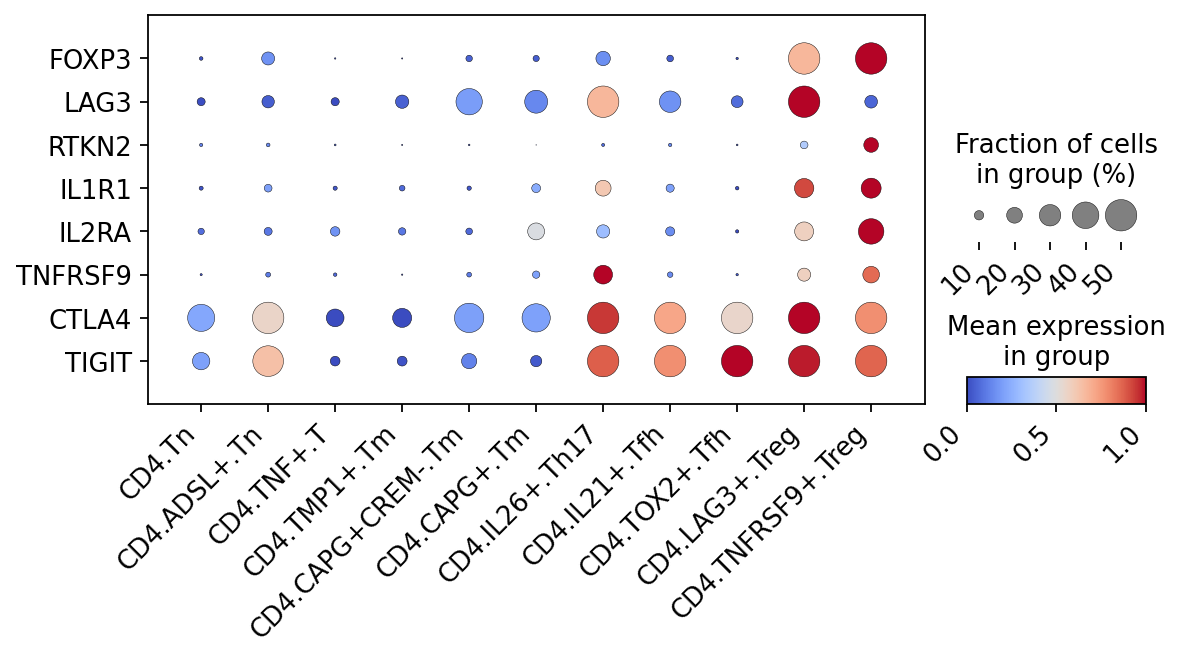

In [63]:
marker_genes_list = ['FOXP3','LAG3','RTKN2','IL1R1','IL2RA','TNFRSF9','CTLA4','TIGIT']
#sc.tl.dendrogram(adata_CD8,groupby='Subcelltype')

ax = sc.pl.dotplot(
    adata_CD4,
    marker_genes_list,
    groupby='Subcelltype',
    dendrogram=False,
    color_map="coolwarm",
    swap_axes=True,
    use_raw=True,
    standard_scale="var",
    var_group_labels=True, 
    figsize=(8,3.2),
    return_fig=False,
    show=False,
    dot_max=0.5,
)

for ax in ax.values(): 
    labels = [item.get_text() for item in ax.get_xticklabels()]
    ax.set_xticklabels(labels, rotation=45, ha='right')



plt.savefig('Gastric/Figure/sFigure3/CD4_Marker_5.png', dpi=300,bbox_inches = 'tight')

In [99]:
adata_CD4.uns['Subcelltype_colors'] = ['#BCCE85','#81B330','#249F3A','#0A5D2F','#89428F','#c69bc6','#F2BC1D','#6BBBDA','#31829F','#D41661','#4D4F95']

<AxesSubplot: title={'center': 'Subcelltype'}, xlabel='X_umap1', ylabel='X_umap2'>

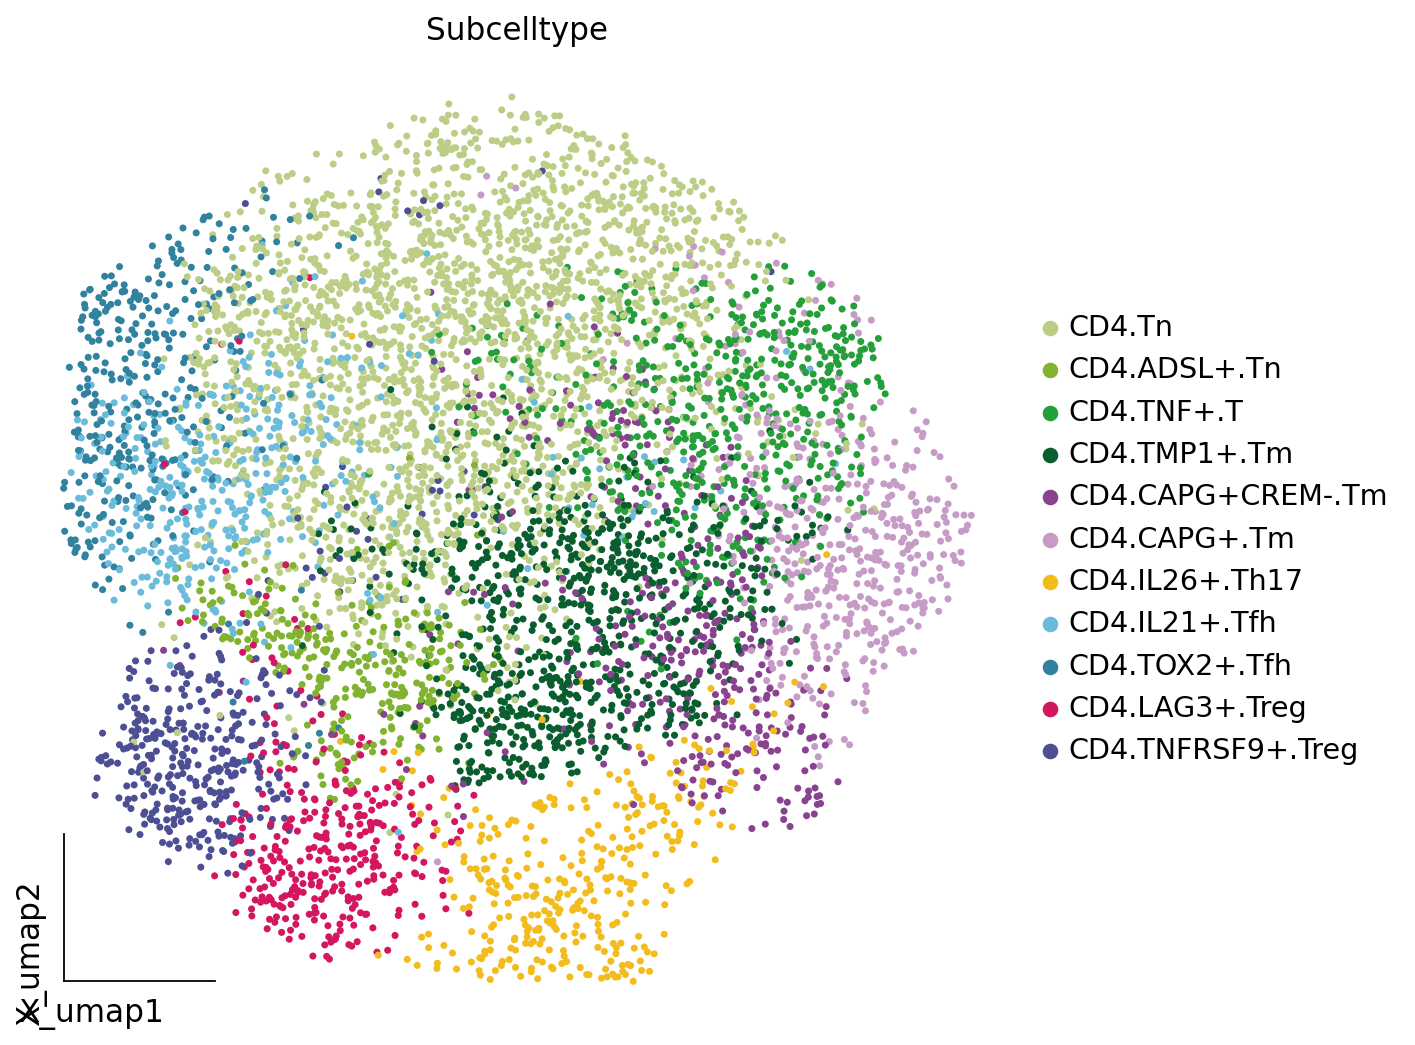

In [100]:
fig, ax = plt.subplots(figsize=(8,8))
ov.utils.embedding(adata_CD4,
                basis='X_umap',frameon='small',
                color=['Subcelltype'],show=False,ax=ax,size=40)

In [101]:
adata_CD8.write_h5ad('Gastric/Data/NKT/CD8_anno_new.h5ad',compression='gzip')
adata_CD4.write_h5ad('Gastric/Data/NKT/CD4_anno_new.h5ad',compression='gzip')